**Task-1**

**stock market prediction and forecasting using stacked LSTM**

**https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv****Data Set Link**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("stock_1.csv")

In [ ]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,27-07-2010,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
df1=df.reset_index()

In [ ]:
df1

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,27-07-2010,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,26-07-2010,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,23-07-2010,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,22-07-2010,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [ ]:
#display all column names of DataFrame
print(df.columns.tolist())


['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']


In [ ]:
#print values in 'points' column
print(df['Close'])

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


In [ ]:
df['Date']

0       28-09-2018
1       27-09-2018
2       26-09-2018
3       25-09-2018
4       24-09-2018
           ...    
2030    27-07-2010
2031    26-07-2010
2032    23-07-2010
2033    22-07-2010
2034    21-07-2010
Name: Date, Length: 2035, dtype: object

In [ ]:
df['year'] = df['Date'].str[-4:]
newdf = df.loc[(df["year"]=='2018') | (df["year"]=='2017') | (df["year"]=='2016') | (df["year"]=='2015')]

In [ ]:
newdf

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),year
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,2018
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,2018
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,2018
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,2018
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,2018
...,...,...,...,...,...,...,...,...,...
923,07-01-2015,147.20,149.20,146.00,148.55,148.45,2770541,4090.99,2015
924,06-01-2015,151.95,151.95,147.00,148.55,148.15,2390258,3565.59,2015
925,05-01-2015,151.65,154.50,151.65,153.15,152.95,1873161,2866.56,2015
926,02-01-2015,150.90,153.20,150.55,153.00,152.50,2043127,3114.04,2015


In [ ]:
datafrom2015to2020=newdf.reset_index()['Close']
datafrom2015to2020.shape

(928,)

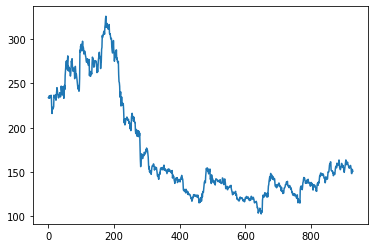

In [ ]:
import matplotlib.pyplot as plt#plotting from 2015 to 2018
plt.plot(datafrom2015to2020)

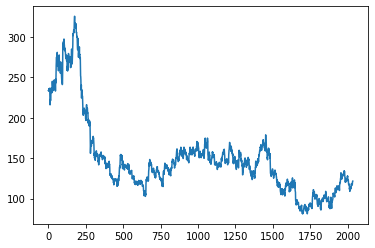

In [ ]:
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(2035, 1)

In [ ]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


**Train and Test Split**

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1322, 713)

In [ ]:
len(train_data)

1322

In [ ]:
len(test_data)

713

In [ ]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [ ]:
test_data

array([[0.24652778],
       [0.23611111],
       [0.25204248],
       [0.25919118],
       [0.25776144],
       [0.2681781 ],
       [0.25449346],
       [0.27103758],
       [0.24530229],
       [0.26756536],
       [0.27267157],
       [0.26633987],
       [0.27410131],
       [0.28615196],
       [0.27818627],
       [0.27205882],
       [0.27124183],
       [0.27798203],
       [0.27083333],
       [0.25857843],
       [0.24285131],
       [0.2250817 ],
       [0.23447712],
       [0.24346405],
       [0.23611111],
       [0.22937092],
       [0.21527778],
       [0.20976307],
       [0.20751634],
       [0.2060866 ],
       [0.20445261],
       [0.20098039],
       [0.21180556],
       [0.19301471],
       [0.18974673],
       [0.20302288],
       [0.21752451],
       [0.20629085],
       [0.19158497],
       [0.17381536],
       [0.17401961],
       [0.18361928],
       [0.17830882],
       [0.19362745],
       [0.20098039],
       [0.20486111],
       [0.21425654],
       [0.218

**Data Preprocessing**

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)


In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [ ]:
print(X_train.shape)

(1221, 100)


In [ ]:
print(y_train)

[0.87111928 0.84497549 0.84027778 ... 0.27389706 0.25347222 0.26041667]


In [ ]:
print(y_train.shape)

(1221,)


In [ ]:
print(X_test)

[[0.24652778 0.23611111 0.25204248 ... 0.34681373 0.3500817  0.32618464]
 [0.23611111 0.25204248 0.25919118 ... 0.3500817  0.32618464 0.32271242]
 [0.25204248 0.25919118 0.25776144 ... 0.32618464 0.32271242 0.3247549 ]
 ...
 [0.13827614 0.13541667 0.13010621 ... 0.14562908 0.15236928 0.15400327]
 [0.13541667 0.13010621 0.12254902 ... 0.15236928 0.15400327 0.14971405]
 [0.13010621 0.12254902 0.12479575 ... 0.15400327 0.14971405 0.1621732 ]]


In [ ]:
print(X_test.shape)

(612, 100)


In [ ]:
print(ytest)

[0.32271242 0.3247549  0.32148693 0.32352941 0.3255719  0.32638889
 0.33496732 0.34395425 0.3441585  0.34599673 0.35866013 0.35580065
 0.37214052 0.36294935 0.3754085  0.36315359 0.34640523 0.34579248
 0.34844771 0.35784314 0.34722222 0.33353758 0.33537582 0.33680556
 0.33680556 0.32271242 0.32638889 0.3188317  0.33986928 0.37765523
 0.3999183  0.36968954 0.35886438 0.35927288 0.35294118 0.32107843
 0.31413399 0.31740196 0.31597222 0.32209967 0.28267974 0.28492647
 0.27389706 0.28778595 0.30187908 0.31045752 0.32128268 0.31454248
 0.33129085 0.33292484 0.32802288 0.32291667 0.32802288 0.32312092
 0.30718954 0.29595588 0.30473856 0.28288399 0.28982843 0.30412582
 0.26429739 0.25285948 0.20710784 0.20261438 0.19566993 0.19546569
 0.20465686 0.18974673 0.19934641 0.1942402  0.21527778 0.21629902
 0.2183415  0.21997549 0.22222222 0.22753268 0.22732843 0.22324346
 0.21527778 0.20690359 0.20200163 0.19955065 0.20159314 0.1807598
 0.19178922 0.19403595 0.19566993 0.20445261 0.20772059 0.21221

In [ ]:
print(ytest.shape)

(612,)


In [ ]:
print(X_test.shape,ytest.shape)

(612, 100) (612,)


**LSTM**

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_train.shape,X_test.shape

((1221, 100, 1), (612, 100, 1))

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 162ms/step - loss: 0.0273 - val_loss: 0.0036
Epoch 2/100
20/20 [==============================] - 2s 116ms/step - loss: 0.0027 - val_loss: 9.5010e-04
Epoch 3/100
20/20 [==============================] - 2s 117ms/step - loss: 0.0016 - val_loss: 8.9718e-04
Epoch 4/100
20/20 [==============================] - 2s 117ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/100
20/20 [==============================] - 2s 116ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 2s 114ms/step - loss: 0.0015 - val_loss: 9.0236e-04
Epoch 7/100
20/20 [==============================] - 2s 116ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/100
20/20 [==============================] - 2s 115ms/step - loss: 0.0012 - val_loss: 9.9417e-04
Epoch 9/100
20/20 [==============================] - 2s 115ms/step - loss: 0.0011 - val_loss: 9.5946e-04
Epoch 10/100
20/20 [==============================] - 2s 117ms/step - l

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


20/20 [==============================] - 0s 22ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.69938241600798

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

115.33511108427257

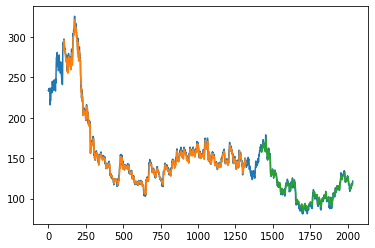

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

713

In [ ]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1631826]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt
len(df1)

2035

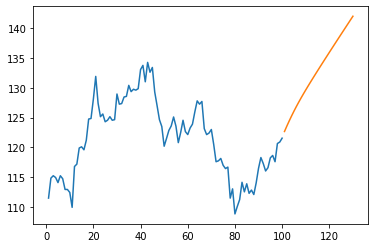

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3 = scaler.inverse_transform(df1)

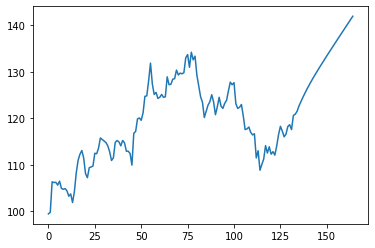

In [ ]:
df3 = np.concatenate((df3, scaler.inverse_transform(lst_output)))

plt.plot(df3[1900:])

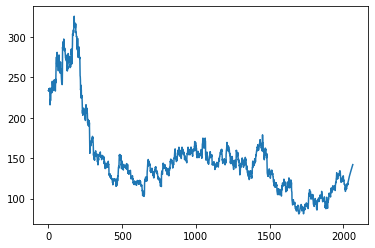

In [ ]:
plt.plot(df3)